In [19]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

In [21]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
final = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns')
final.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


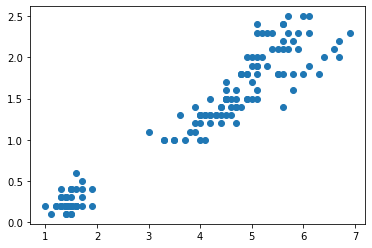

In [29]:
plt.scatter(final['petal length (cm)'], final['petal width (cm)'])

In [24]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [30]:
y_predicted = km.fit_predict(final[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
final['cluster'] = y_predicted
final.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [39]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

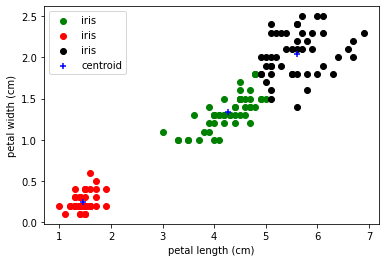

In [40]:
final1 = final[final.cluster==0]
final2 = final[final.cluster==1]
final3 = final[final.cluster==2]

p1 = plt.scatter(final1['petal length (cm)'], final1['petal width (cm)'], color='green')
p2 = plt.scatter(final2['petal length (cm)'], final2['petal width (cm)'], color='red')
p3 = plt.scatter(final3['petal length (cm)'], final3['petal width (cm)'], color='black')
p4 = plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='blue', marker='+')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend([p1, p2, p3, p4], ['iris', 'iris', 'iris', 'centroid'])

In [44]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(final[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 13.91690875790876,
 11.057257664362925,
 9.351278265851802,
 7.70985119047619,
 6.572684704184703]

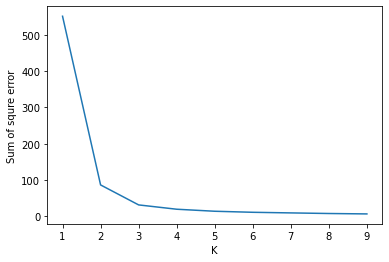

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of squre error')
plt.plot(k_rng, sse)

In [ ]:
# perform Silhoutt score for validation